# Gathering data

In [1]:
import zipfile
from io import BytesIO
from urllib.request import urlopen
import glob
import os

In [2]:
def reading_file_data_from_zip_url(URL, FILENAME):
  data = BytesIO()
  with urlopen(ZIP_FILE_PATH) as zip_file_ref:
    with zipfile.ZipFile(BytesIO(zip_file_ref.read()), 'r') as zip_ref:
      data = zip_ref.read(FILENAME)
  return data

In [3]:
ZIP_FILE_PATH = "https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip"
RAW_FILENAME = "household_power_consumption.txt"
rawdata = reading_file_data_from_zip_url(ZIP_FILE_PATH, RAW_FILENAME)
print(type(rawdata))
FILENAME = 'temp.csv' 
with open(FILENAME, 'w') as fptr:
  fptr.writelines(rawdata.decode())

<class 'bytes'>


# Data Ingestion

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv(FILENAME, sep=';', na_values='?')

In [6]:
# DATA CLEANUP
os.remove(FILENAME)

In [7]:
df = df.sample(frac=0.1)

# Explorative Data Analysis (EDA)

In [8]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1327914,25/6/2009,21:18:00,0.376,0.238,242.91,1.8,0.0,0.0,0.0
342260,11/8/2007,09:44:00,1.358,0.000,235.73,5.8,0.0,0.0,17.0
25459,3/1/2007,09:43:00,0.776,0.080,239.53,3.4,0.0,0.0,0.0
834737,18/7/2008,09:41:00,0.200,0.000,237.44,0.8,0.0,0.0,1.0
1440837,12/9/2009,07:21:00,2.342,0.228,236.22,9.8,0.0,0.0,28.0


In [9]:
df.shape

(207526, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207526 entries, 1327914 to 486019
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   207526 non-null  object 
 1   Time                   207526 non-null  object 
 2   Global_active_power    204923 non-null  float64
 3   Global_reactive_power  204923 non-null  float64
 4   Voltage                204923 non-null  float64
 5   Global_intensity       204923 non-null  float64
 6   Sub_metering_1         204923 non-null  float64
 7   Sub_metering_2         204923 non-null  float64
 8   Sub_metering_3         204923 non-null  float64
dtypes: float64(7), object(2)
memory usage: 15.8+ MB


In [11]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,204923.000000,204923.000000,204923.000000,204923.000000,204923.000000,204923.000000,204923.000000
mean,1.092467,0.123563,240.837395,4.631154,1.132699,1.300376,6.443811
std,1.058570,0.112725,3.239820,4.449912,6.176174,5.833559,8.430795
min,0.076000,0.000000,223.490000,0.200000,0.000000,0.000000,0.000000
25%,0.308000,0.048000,238.990000,1.400000,0.000000,0.000000,0.000000
50%,0.602000,0.100000,241.000000,2.600000,0.000000,0.000000,1.000000
75%,1.526000,0.194000,242.880000,6.400000,0.000000,1.000000,17.000000
max,9.938000,1.222000,253.260000,43.400000,86.000000,79.000000,31.000000


In [12]:
df.duplicated().sum()

0

In [13]:
df.isna().sum()

Date                        0
Time                        0
Global_active_power      2603
Global_reactive_power    2603
Voltage                  2603
Global_intensity         2603
Sub_metering_1           2603
Sub_metering_2           2603
Sub_metering_3           2603
dtype: int64

## Summary

1. No Duplicates found
2. Found null values

## Dropping null values

In [14]:
df.dropna(inplace=True)

In [15]:
df.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [16]:
df.shape

(204923, 9)

In [17]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,204923.000000,204923.000000,204923.000000,204923.000000,204923.000000,204923.000000,204923.000000
mean,1.092467,0.123563,240.837395,4.631154,1.132699,1.300376,6.443811
std,1.058570,0.112725,3.239820,4.449912,6.176174,5.833559,8.430795
min,0.076000,0.000000,223.490000,0.200000,0.000000,0.000000,0.000000
25%,0.308000,0.048000,238.990000,1.400000,0.000000,0.000000,0.000000
50%,0.602000,0.100000,241.000000,2.600000,0.000000,0.000000,1.000000
75%,1.526000,0.194000,242.880000,6.400000,0.000000,1.000000,17.000000
max,9.938000,1.222000,253.260000,43.400000,86.000000,79.000000,31.000000


In [18]:
df['Total_Sub_metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']

In [19]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Total_Sub_metering'],
      dtype='object')

In [20]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Sub_metering
Global_active_power,1.000000,0.244236,-0.398892,0.998886,0.483529,0.434542,0.636991,0.846014
Global_reactive_power,0.244236,1.000000,-0.107221,0.263230,0.115854,0.135038,0.088421,0.174673
Voltage,-0.398892,-0.107221,1.000000,-0.410603,-0.194170,-0.167341,-0.265883,-0.343096
Global_intensity,0.998886,0.263230,-0.410603,1.000000,0.488069,0.440304,0.625034,0.842973
Sub_metering_1,0.483529,0.115854,-0.194170,0.488069,1.000000,0.053676,0.100036,0.569570
Sub_metering_2,0.434542,0.135038,-0.167341,0.440304,0.053676,1.000000,0.083383,0.533481
Sub_metering_3,0.636991,0.088421,-0.265883,0.625034,0.100036,0.083383,1.000000,0.740641
Total_Sub_metering,0.846014,0.174673,-0.343096,0.842973,0.569570,0.533481,0.740641,1.000000


In [21]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Total_Sub_metering'],
      dtype='object')

# Model - Train & Test data 

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
df_frac = df.sample(frac = 0.15)

In [24]:
df_frac.shape

(30738, 10)

In [25]:
X = df_frac.iloc[:, 2:6]

In [26]:
y = df_frac.iloc[:, -1]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1, shuffle=True)

In [28]:
print("X:", X_train.shape, X_test.shape)
print("y:", y_train.shape, y_test.shape)

X: (27664, 4) (3074, 4)
y: (27664,) (3074,)


# Learning - Decision Tree Regression

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
dt_r = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

In [31]:
dt_r.fit(X,y)
print("R-Squared on train dataset={}".format(dt_r.score(X_test,y_test)))

R-Squared on train dataset=0.7728073234852507


In [32]:
dt_r.fit(X_test,y_test)   
print("R-Squaredon test dataset={}".format(dt_r.score(X_test,y_test)))

R-Squaredon test dataset=0.7844985668538899


# Hyperparameter tuning

In [33]:
param_grid = {"criterion": ["absolute_error", "squared_error", "friedman_mse"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100]
              }

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
grid_cv_dtm = GridSearchCV(dt_r, param_grid, cv=2)
grid_cv_dtm.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10,
                                             min_samples_split=5),
             param_grid={'criterion': ['absolute_error', 'squared_error',
                                       'friedman_mse'],
                         'max_depth': [2, 6, 8], 'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

In [36]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))

print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::0.7521042602680457
Best Hyperparameters::
{'criterion': 'squared_error', 'max_depth': 6, 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [37]:
hp_df = pd.DataFrame(data=grid_cv_dtm.cv_results_)

# Post training Visualization 

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

[Text(0.3472222222222222, 0.9, 'X[0] <= 1.212\nsquared_error = 156.515\nsamples = 3074\nvalue = 8.783'),
 Text(0.1111111111111111, 0.7, 'X[0] <= 0.794\nsquared_error = 6.128\nsamples = 1845\nvalue = 1.234'),
 Text(0.05555555555555555, 0.5, 'squared_error = 1.118\nsamples = 1655\nvalue = 0.795'),
 Text(0.16666666666666666, 0.5, 'X[2] <= 236.31\nsquared_error = 33.465\nsamples = 190\nvalue = 5.058'),
 Text(0.1111111111111111, 0.3, 'squared_error = 30.354\nsamples = 12\nvalue = 14.25'),
 Text(0.2222222222222222, 0.3, 'squared_error = 27.594\nsamples = 178\nvalue = 4.438'),
 Text(0.5833333333333334, 0.7, 'X[3] <= 14.3\nsquared_error = 168.293\nsamples = 1229\nvalue = 20.116'),
 Text(0.3888888888888889, 0.5, 'X[0] <= 2.548\nsquared_error = 66.215\nsamples = 1099\nvalue = 17.156'),
 Text(0.3333333333333333, 0.3, 'squared_error = 52.148\nsamples = 962\nvalue = 16.181'),
 Text(0.4444444444444444, 0.3, 'X[1] <= 0.111\nsquared_error = 111.474\nsamples = 137\nvalue = 24.0'),
 Text(0.3888888888888

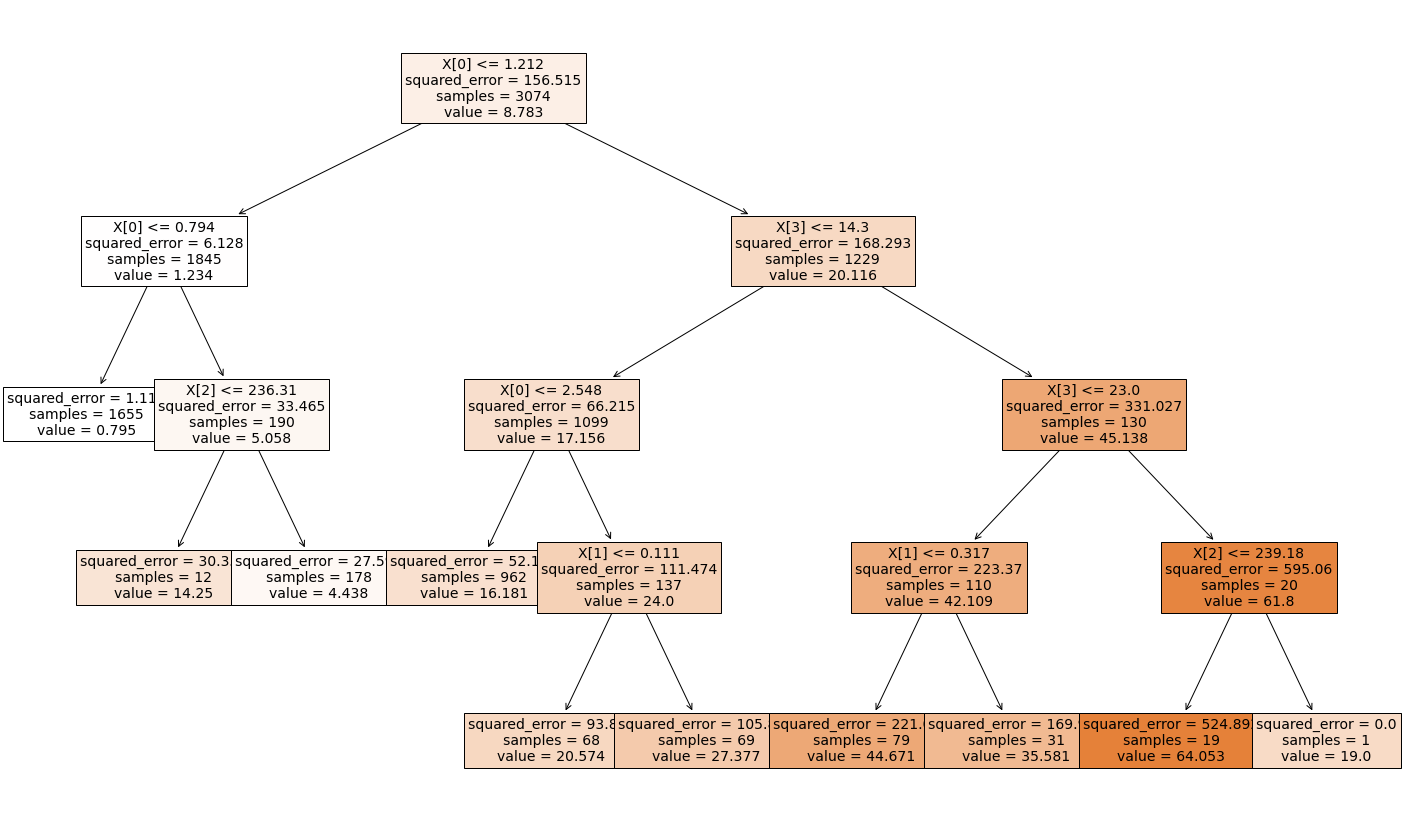

In [40]:
from sklearn import tree

fig = plt.figure(figsize=(25, 15))
tree.plot_tree(dt_r, filled=True, fontsize=14)

[Text(0.5, 1.0, 'Effect of Depth and Leaf Nodes on Model Performance')]

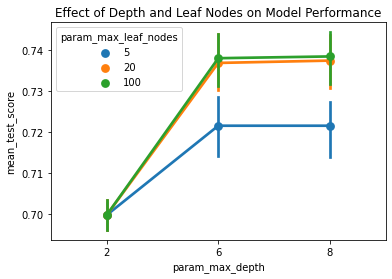

In [41]:
fig,ax = plt.subplots()
sns.pointplot(data=hp_df[[
    'mean_test_score',
    'param_max_leaf_nodes',
    'param_max_depth']],
    y='mean_test_score',
    x='param_max_depth',
    hue='param_max_leaf_nodes',
    ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")

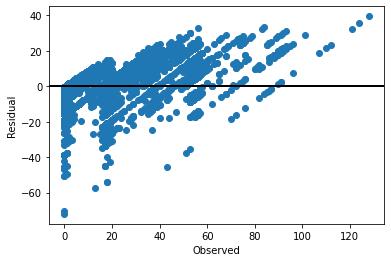

In [42]:
predicted = grid_cv_dtm.best_estimator_.predict(X_train)
residuals = y_train-predicted

fig, ax = plt.subplots()
ax.scatter(y_train, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

# Cross Validation of the model

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
r2_scores = cross_val_score(grid_cv_dtm.best_estimator_, X, y, cv=10)
mse_scores = cross_val_score(grid_cv_dtm.best_estimator_, X, y, cv=10,scoring='neg_mean_squared_error')

print("avg R-squared::{:.3f}".format(np.mean(r2_scores)))
print("MSE::{:.3f}".format(np.mean(mse_scores)))

avg R-squared::0.758
MSE::-38.978


# Performance Metrics 

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
best_dtm_model = grid_cv_dtm.best_estimator_

y_pred = best_dtm_model.predict(X_test)
residuals = y_test - y_pred


r2_score = best_dtm_model.score(X_test,y_test)
print("R-squared:{:.3f}".format(r2_score))
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))

R-squared:0.774
MSE: 35.38
